In [1]:
%load_ext autoreload
%autoreload 2

# Placeholder graphs
Graphs with dummy data

# Resources
- https://medium.com/@andykashyap/top-5-tricks-to-make-plots-look-better-9f6e687c1e08

In [2]:
import os
import pandas as pd
import numpy as np

from scipy import stats

import multiprocessing as mp
import itertools
import tqdm

import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.cm as cm
import matplotlib.colors as mcolors

from libphase.scripts.simpoint import simpoint

import seaborn as sns

style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')
sns.set(context="talk", style="ticks", font_scale=1.5)

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# Chapter 2: Challenges and opportunities

## 1. Use fixed, non-overlapping windows

### Simple example

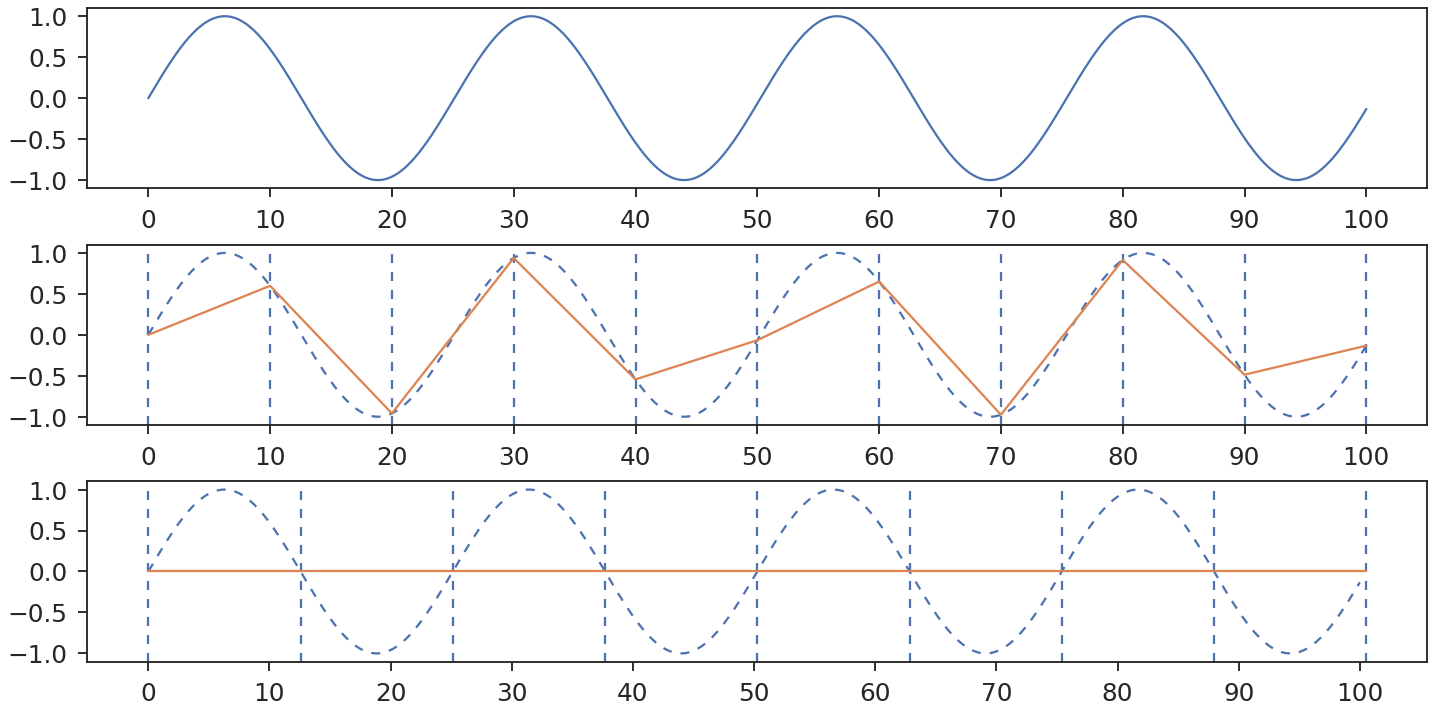

In [3]:
xs = np.linspace(0, 100, 1001)
sin = np.sin((xs + 10) * (np.pi) / 10)
sin = np.sin(xs / 4)

dashes = (4, 4, 4, 4)

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

plt.subplot(3, 1, 1)
plt.plot(xs, sin)
plt.xticks(np.linspace(0, 100, 11))
plt.yticks(np.linspace(-1, 1, 5))

plt.subplot(3, 1, 2)
plt.plot(xs, sin, dashes=dashes)
plt.xticks(np.linspace(0, 100, 11))
plt.yticks(np.linspace(-1, 1, 5))

for i in np.linspace(0, 100, 11):
    plt.axvline(x=i, ymin=0, ymax=1, dashes=dashes)

plt.plot(np.linspace(0, 100, 11), np.sin(np.linspace(0, 100, 11) / 4))

plt.subplot(3, 1, 3)
plt.plot(xs, sin, dashes=dashes)
plt.xticks(np.linspace(0, 100, 11))
plt.yticks(np.linspace(-1, 1, 5))
for i in np.arange(0, 101, 4 * np.pi):
    plt.axvline(x=i, ymin=0, ymax=1, dashes=dashes)
    
plt.plot(np.arange(0, 101, 4 * np.pi), np.sin(np.arange(0, 101, 4 * np.pi)))

fig.tight_layout(pad=1.0)

### Shifting / scaling

In [4]:
# Units of millions
path = "../tmp/spec_1m/500.perlbench_r.1.bbv"

In [5]:
def shiftscale(path, shift = 0, scale = 1):
    print("{}: {} {}".format(path, shift, scale))
    mpath = path.replace("bbv", "{}.{}.bbv".format(shift, scale))
    out = open(mpath, "w")
    with open(path, "r") as f:
        nline = 0
        interval = {}

        for line in f:

            # Skip all lines that don't begin with T
            if line[0] != "T":
                continue

            nline += 1

            # Shift by certain number of intervals
            if nline <= shift:
                continue

            # Start new window
            if (nline - shift - 1) % scale == 0:
                if len(interval.keys()) > 0:
                    # write
                    to_write = "T" + " ".join([":{}:{}".format(key, interval[key]) for key in interval])
                    out.write(to_write)
                    out.write("\n")

                # Create a new interval
                interval = {}

            bbv = line[1:].split()
            for bb in bbv:
                key, val = bb.split(":")[1:]
                if key in interval:
                    interval[key] += int(val)
                else:
                    interval[key] = int(val)

In [6]:
shifts = np.arange(100, 1000, 100)

In [7]:
shifts

array([100, 200, 300, 400, 500, 600, 700, 800, 900])

In [8]:
scales = [1000]

In [9]:
args = itertools.product([path], shifts, scales)

In [111]:
args

In [10]:
args, num_jobs = itertools.tee(args)
num_jobs = len(list(num_jobs))

In [11]:
num_jobs

9

In [12]:
def runner(args):
    return shiftscale(*args)

In [226]:
# shiftscale(path, 10000, 10000)
# simpoint("../tmp/bbv/500.perlbench_r.1.10000.10000.bbv", None, 30, False, "{}.{}".format(10000, 10000), True, True, None)

{'bbv_file': '../tmp/bbv/500.perlbench_r.1.10000.10000.bbv', 'k': None, 'max_k': 30, 'variable_length': False, 'output_dir': '10000.10000', 'verbose': True, 'quiet': True, 'args': None}
/home/dsuo/libphase/tmp/bbv/10000.10000
Command:  /home/dsuo/libphase/build/deps/simpoint/simpoint-git-prefix/src/simpoint-git/bin/simpoint -loadFVFile ../tmp/bbv/500.perlbench_r.1.10000.10000.bbv -saveSimpoints /home/dsuo/libphase/tmp/bbv/10000.10000/out.simpoints -saveSimpointWeights /home/dsuo/libphase/tmp/bbv/10000.10000/out.weights -saveFinalCtrs /home/dsuo/libphase/tmp/bbv/10000.10000/out.centres -saveLabels /home/dsuo/libphase/tmp/bbv/10000.10000/out.labels -saveVectorsTxtFmt /home/dsuo/libphase/tmp/bbv/10000.10000/out.vectors -k search -maxK 30


(b'Command-line: "/home/dsuo/libphase/build/deps/simpoint/simpoint-git-prefix/src/simpoint-git/bin/simpoint -loadFVFile ../tmp/bbv/500.perlbench_r.1.10000.10000.bbv -saveSimpoints /home/dsuo/libphase/tmp/bbv/10000.10000/out.simpoints -saveSimpointWeights /home/dsuo/libphase/tmp/bbv/10000.10000/out.weights -saveFinalCtrs /home/dsuo/libphase/tmp/bbv/10000.10000/out.centres -saveLabels /home/dsuo/libphase/tmp/bbv/10000.10000/out.labels -saveVectorsTxtFmt /home/dsuo/libphase/tmp/bbv/10000.10000/out.vectors -k search -maxK 30"\nUsing these options (*** indicates user-specified option):\n*** -loadFVFile : ../tmp/bbv/500.perlbench_r.1.10000.10000.bbv\n*** -k : search\n    -iters : 100\n    -dim : 15\n*** -maxK : 30\n    -numInitSeeds : 5\n    -coveragePct : 1\n    -bicThreshold : 0.9\n    -saveAll : false\n    -initkm : samp\n*** -saveLabels : /home/dsuo/libphase/tmp/bbv/10000.10000/out.labels\n*** -saveSimpoints : /home/dsuo/libphase/tmp/bbv/10000.10000/out.simpoints\n*** -saveSimpointWeight

In [13]:
# with mp.Pool(processes=mp.cpu_count()) as pool:
#     result = list(tqdm.tqdm(pool.imap(runner, args), total=num_jobs))

In [14]:
bbv_paths = !find "../tmp/bbv" | grep "500.perlbench_r.1" | grep "bbv"

In [15]:
# for bbv_path in bbv_paths:
#     shift, scale = bbv_path.split("/")[-1].split(".")[3:5]
#     simpoint(bbv_path, None, 30, False, "{}.{}".format(shift, scale), True, True, None)

In [330]:
class SimPoint(object):
    def __init__(self, benchmark, directory, shift=0, scale=1):
        self.benchmark = benchmark
        self.directory = os.path.abspath(directory)
        self.shift = shift
        self.scale = scale
        
        # Load simpoint id and weight
        self.simpoint_meta = pd.read_csv(os.path.join(self.directory, "out.simpoints"), sep=" ", names=["vid", "sid"])
        weights = pd.read_csv(os.path.join(self.directory, "out.weights"), sep=" ", names=["weight", "sid"])
        self.simpoint_meta = self.simpoint_meta.merge(weights)
        
        # Load simpoint coordinates; strip off weight [0], dimension [1], and NaN [17]
        self.simpoint_coords = pd.read_csv(os.path.join(self.directory, "out.centres"), sep=" ", skiprows=1, header=None)
        self.simpoint_coords = self.simpoint_coords.drop(columns=[0, 1, 17])
        self.simpoint_coords.columns = range(15)
        
        # Load frequency vector labels
        self.fv_meta = pd.read_csv(os.path.join(self.directory, "out.labels"), sep=" ", names=["sid", "distance"])
        self.fv_meta["period"] = self.fv_meta.index
        
        # Load projected frequency vectors
        self.fv_coords = pd.read_csv(os.path.join(self.directory, "out.vectors"), sep=" ", skiprows=1, header=None)
        self.fv_coords = self.fv_coords.drop(columns=[0, 1, 17])
        self.fv_coords.columns = range(15)
        
        # Expand according to scale
        self.expanded_fv_meta = self.fv_meta.loc[self.fv_meta.index.repeat(scale)].reset_index(drop=True)
        self.expanded_fv_meta["period"] = self.expanded_fv_meta.index + shift
        
        self.expanded_fv_coords = self.fv_coords.loc[self.fv_coords.index.repeat(scale)].reset_index(drop=True)
        self.expanded_fv_coords["period"] = self.expanded_fv_coords.index + shift
        
        self.expanded_fv = self.expanded_fv_meta.merge(self.simpoint_coords, left_on="sid", right_index=True).sort_index()
        
        print(self.directory)
    
    # Run validation on inputs
    def validate(self):
        # Verify label and distances match computed distance between simpoint and fv coordinates
        data = pd.concat([self.fv_meta, self.fv_coords], axis=1).merge(self.simpoint_coords, left_on="sid", right_index=True).sort_index()
        x = data[["{}_x".format(i) for i in range(15)]]
        y = data[["{}_y".format(i) for i in range(15)]]
        d = np.sqrt(np.square(np.array(x) - np.array(y)).sum(axis=1))
        
        return np.allclose(d, data.distance)
    
    # delta True: find distance between centers
    # delta False: match class and plot
    def plot(self, others=None, delta=True):
        fig, ax = plt.subplots()
        fig.set_size_inches(20, 10)

        if not delta:
            ax.plot(self.expanded_fv_meta.period, self.expanded_fv_meta.sid)
        
        if others is not None:
            for other in others:
                other.match(self)
                fv_meta = other.expanded_fv_meta.merge(other.simpoint_meta, how="left")
                if not delta:
                    ax.plot(fv_meta.period, fv_meta["mid.{}.{}".format(self.shift, self.scale)])
                else:
                    merged = self.expanded_fv.merge(other.expanded_fv, on="period")
                    x = merged[["{}_x".format(i) for i in range(15)]]
                    y = merged[["{}_y".format(i) for i in range(15)]]
                    d = np.sqrt(np.square(np.array(x) - np.array(y)).sum(axis=1))
                    ax.plot(merged.period[other.scale:], d[other.scale:], label="{}.{}".format(other.shift, other.scale))
                    
        plt.legend()
    
    def match(self, other):
        matched = pd.DataFrame(index=self.simpoint_meta.index, columns=["mid"])
        col = "mid.{}.{}".format(other.shift, other.scale)
        for i in range(self.simpoint_meta.shape[0]):
            matched.mid.iloc[i] = np.square(other.simpoint_coords - self.simpoint_coords.iloc[i]).sum(axis=1).idxmin()
        
        self.simpoint_meta[col] = matched.mid

In [331]:
data = {}
for i in np.arange(0, 11000, 1000):
    shift = i
    scale = 10000
    name = "{}.{}".format(shift, scale)
    print("Loading {}".format(name))
    data[name] = SimPoint("500.perlbench_r.1", "../tmp/bbv/{}".format(name), shift=shift, scale=scale)

Loading 0.10000
/home/dsuo/libphase/tmp/bbv/0.10000
Loading 1000.10000
/home/dsuo/libphase/tmp/bbv/1000.10000
Loading 2000.10000
/home/dsuo/libphase/tmp/bbv/2000.10000
Loading 3000.10000
/home/dsuo/libphase/tmp/bbv/3000.10000
Loading 4000.10000
/home/dsuo/libphase/tmp/bbv/4000.10000
Loading 5000.10000
/home/dsuo/libphase/tmp/bbv/5000.10000
Loading 6000.10000
/home/dsuo/libphase/tmp/bbv/6000.10000
Loading 7000.10000
/home/dsuo/libphase/tmp/bbv/7000.10000
Loading 8000.10000
/home/dsuo/libphase/tmp/bbv/8000.10000
Loading 9000.10000
/home/dsuo/libphase/tmp/bbv/9000.10000
Loading 10000.10000
/home/dsuo/libphase/tmp/bbv/10000.10000


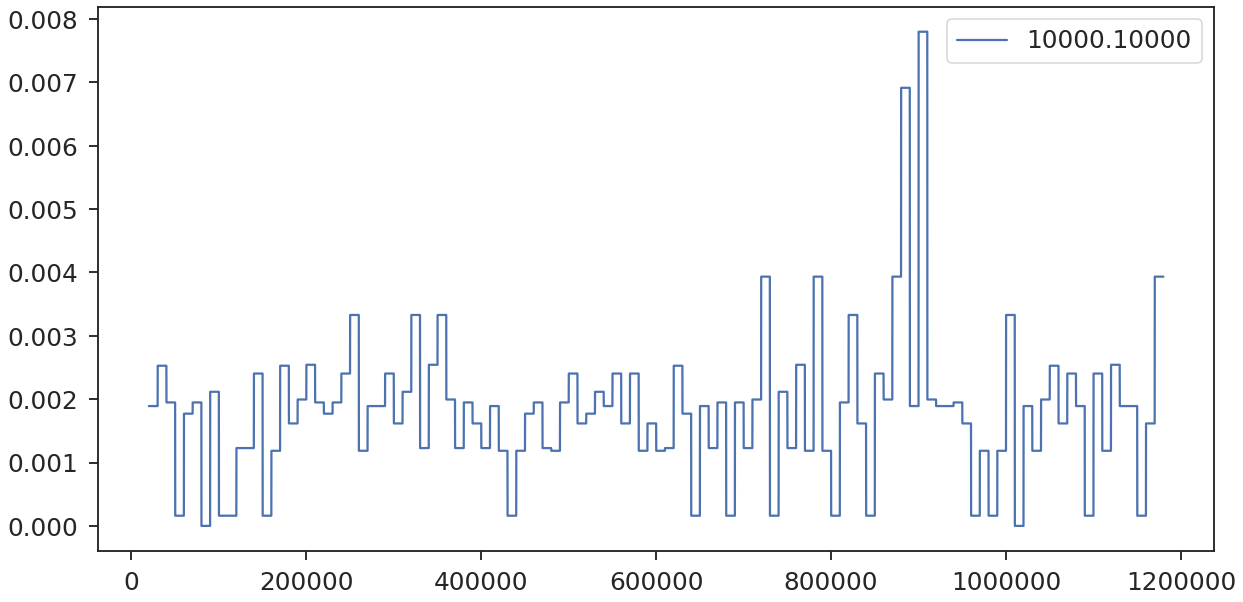

In [332]:
data["0.10000"].plot([data["10000.10000"]], delta=True)

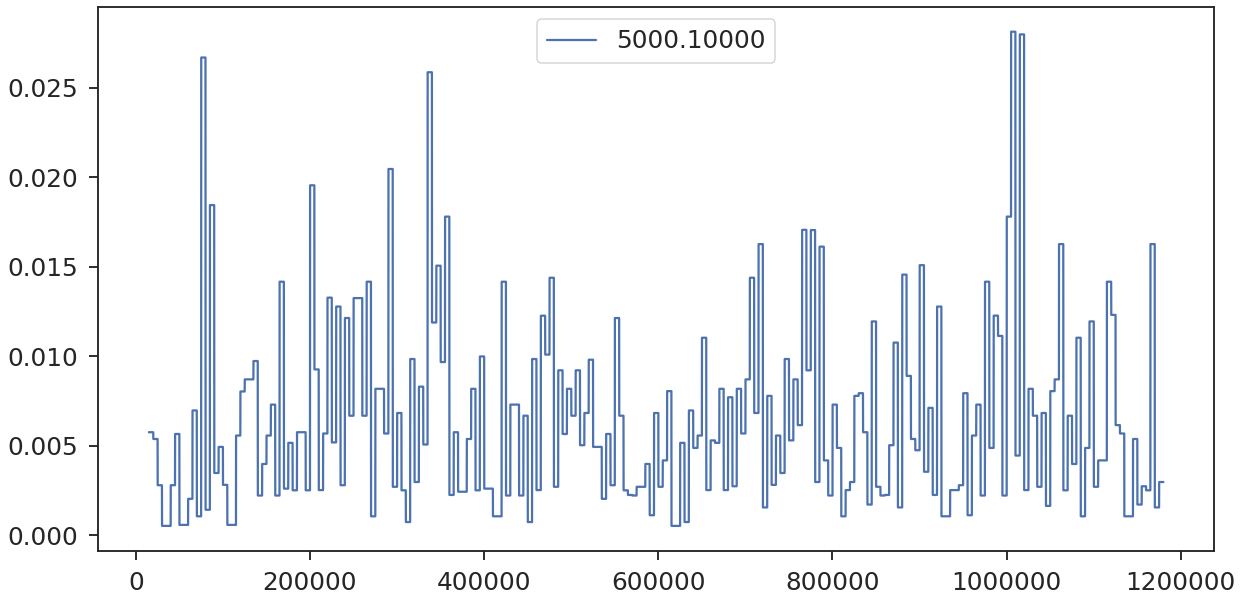

In [335]:
data["0.10000"].plot([data["5000.10000"]], delta=True)

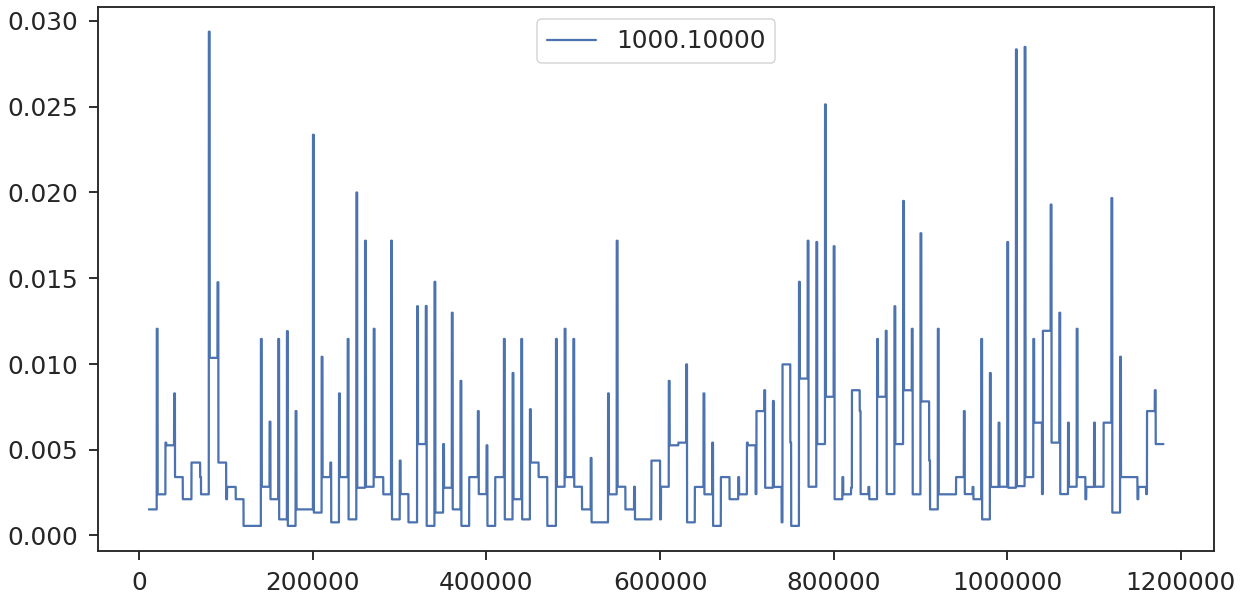

In [333]:
data["0.10000"].plot([data["1000.10000"]], delta=True)

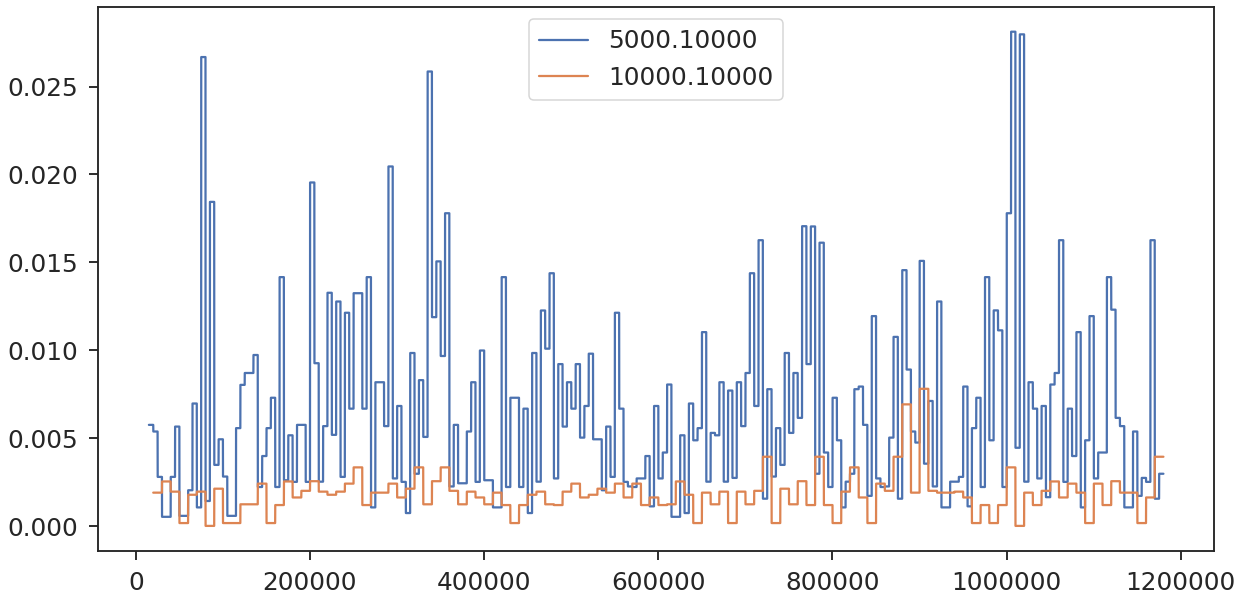

In [336]:
data["0.10000"].plot([data["5000.10000"], data["10000.10000"]], delta=True)

,sid,distance
0,6,5.421010e-20
1,1,1.759760e-03
2,2,6.739950e-04
3,11,1.534340e-03
4,2,1.678090e-03
...,...,...
113,2,9.279400e-04
114,2,1.436750e-03
115,3,1.261060e-03
116,1,3.091590e-03


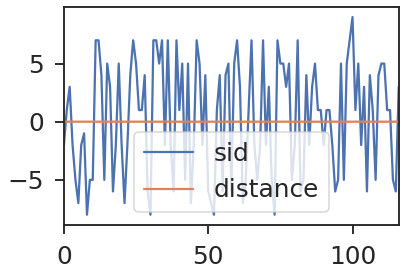

In [235]:
(data["0.10000"].fv_meta.iloc[1:,].reset_index(drop=True) - data["10000.10000"].fv_meta).plot()

In [230]:
data["10000.10000"].fv_meta

,sid,distance
0,3,0.002343
1,1,0.001697
2,8,0.001778
3,4,0.001407
4,8,0.001134
...,...,...
112,1,0.001433
113,1,0.000823
114,8,0.001319
115,7,0.003352


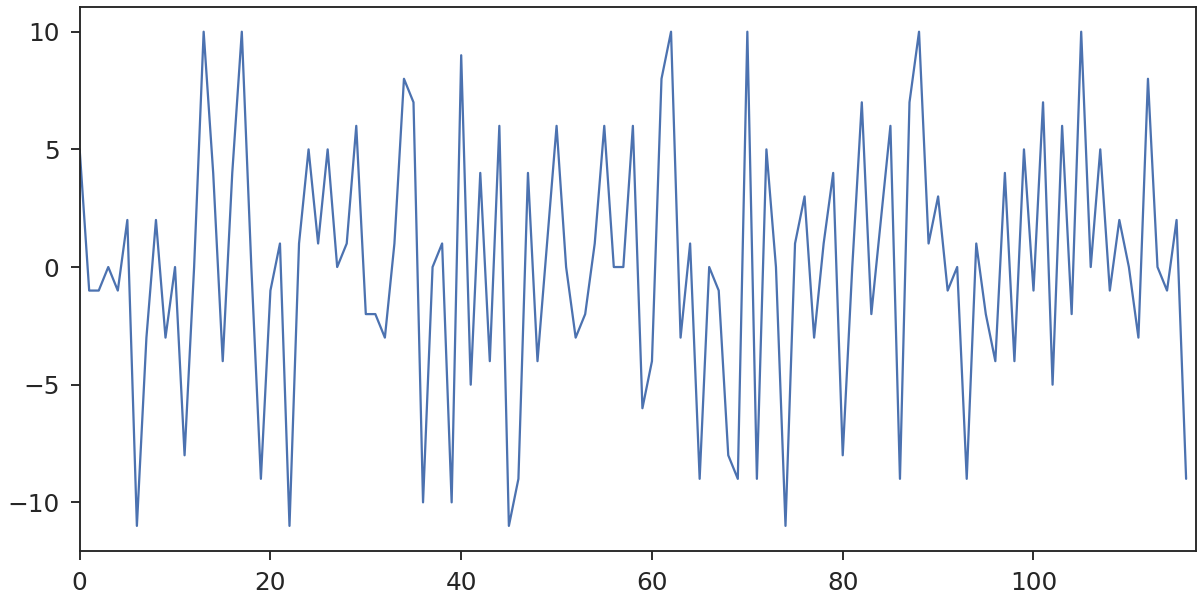

In [236]:
# [data["{}.10000".format(x)] for x in np.arange(1000, 10000, 1000)]
data["0.10000"].plot([data["10000.10000"]], delta=True)

In [209]:
sp_8000_10000.validate()

True

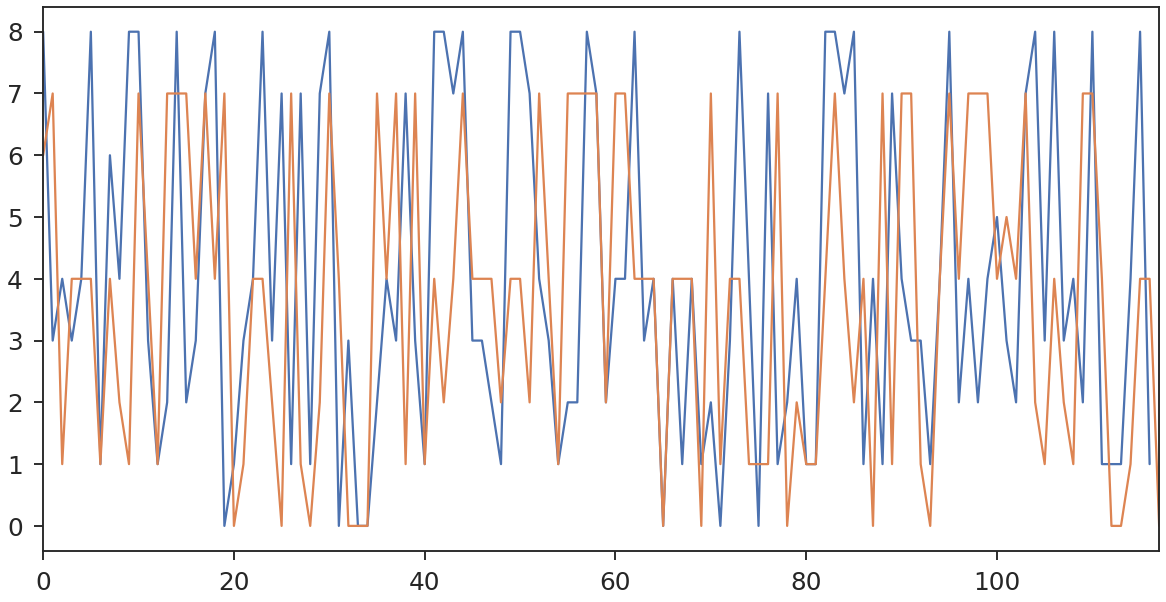

In [210]:
sp_8000_10000.plot([sp_2000_10000])

In [205]:
sp_2000_10000.simpoint_meta

,vid,sid,weight,mid.8000.10000
0,24,0,0.093220,2
1,98,1,0.279661,7
2,76,2,0.169492,1
3,0,3,0.008475,6
4,101,4,0.008475,5
5,64,5,0.322034,4
6,93,6,0.118644,0


In [171]:
sp_8000_10000.simpoint_meta

,vid,sid,weight
0,34,0,0.059829
1,116,1,0.170940
2,56,2,0.111111
3,16,3,0.162393
4,108,4,0.170940
5,100,5,0.008547
6,7,6,0.008547
7,76,7,0.102564
8,23,8,0.205128


In [163]:
sp_2000_10000.simpoint_meta.merge(sp_8000_10000.match(sp_2000_10000), left_index=True, right_index=True)

,vid,sid,weight,mid
0,24,0,0.093220,2
1,98,1,0.279661,7
2,76,2,0.169492,1
3,0,3,0.008475,6
4,101,4,0.008475,5
5,64,5,0.322034,4
6,93,6,0.118644,0


In [173]:
matched = sp_2000_10000.fv_meta.merge(sp_2000_10000.simpoint_meta.merge(sp_8000_10000.match(sp_2000_10000), left_index=True, right_index=True), how="left")

In [157]:
sp_2000_10000.fv_meta

,sid,distance
0,3,0.000000
1,1,0.001585
2,2,0.002344
3,5,0.001374
4,5,0.001043
...,...,...
113,6,0.003108
114,2,0.002198
115,5,0.002498
116,5,0.003176


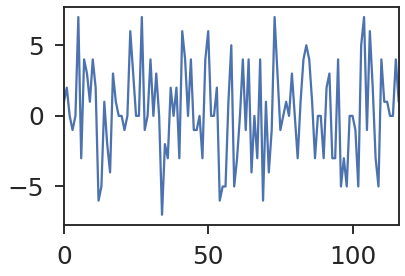

In [181]:

(sp_8000_10000.fv_meta.sid - matched.iloc[1:,].reset_index().mid).plot()

In [178]:
matched.mid.iloc[1:,]

1      7
2      1
3      4
4      4
5      4
      ..
113    0
114    1
115    4
116    4
117    0
Name: mid, Length: 117, dtype: int64

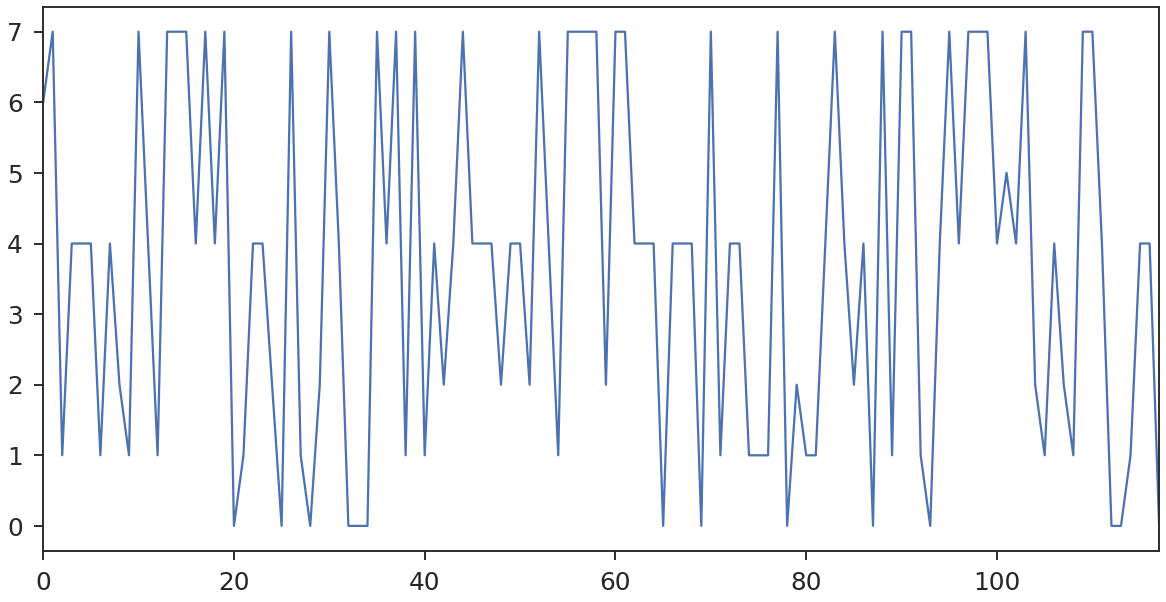

In [169]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

sp_2000_10000.fv_meta.merge(sp_2000_10000.simpoint_meta.merge(sp_8000_10000.match(sp_2000_10000), left_index=True, right_index=True), how="left")["mid"].plot(ax=ax)

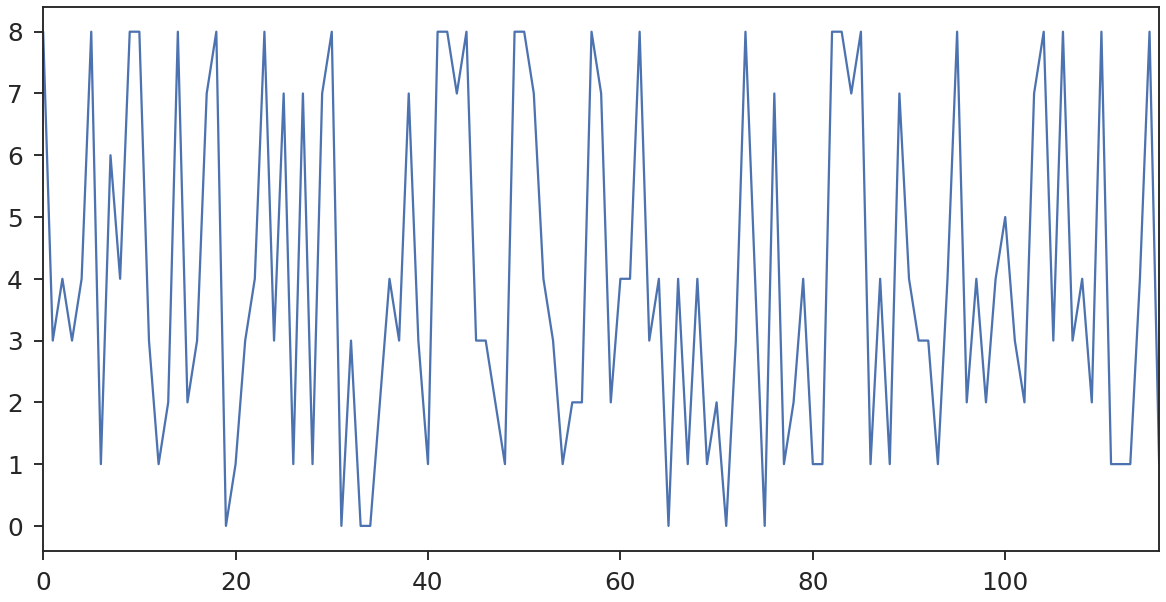

In [170]:
sp_8000_10000.plot()

In [ ]:
for 